# Assignment - Application: Spectral Theory
---
<b>Submitted by Maria Eloisa H. Garcia (ID No. 20102861, BSCS-III) <br>
## Assignment
- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will receive a failing grade.<br>
### I. Spectral Clustering

In [2]:
import pandas as pd
import numpy as np
from numpy import inf
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

def print_mat(matrix, name="Matrix"):
    print(f"{name}:\n")
    for row in matrix:
        row_str = "[" + ", ".join(map(str, row)) + "]"
        print(row_str)
    print("\n")

##### 1. Derive the adjacency matrix from the dataset: https://www.kaggle.com/datasets/muhammadtalhaawan/world-sugar-dataset-2018-2024/data

In [3]:
# Read the sugar dataset
data_frame = pd.read_csv('spectral_theory/combined_df.csv')

# Assuming 'Name' is the column containing country names
unique_nodes = data_frame['Name'].unique()
num_nodes = len(unique_nodes)
adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

node_indices = {node: index for index, node in enumerate(unique_nodes)}

for _, row in data_frame.iterrows():
    source_node_index = node_indices[row['Name']]
    target_nodes = data_frame[data_frame['Action'] == row['Action']]['Name'].values

    for target_node in target_nodes:
        target_node_index = node_indices[target_node]
        adj_matrix[source_node_index, target_node_index] = 1
        adj_matrix[target_node_index, source_node_index] = 1
        
A = adj_matrix
print_mat(A, "Adjacency Matrix")

Adjacency Matrix:

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

##### 2. Establish a diagonal matrix $D$.

In [4]:
D = np.diag(A.sum(axis=1))
print_mat(D, "Diagonal Matrix")

Diagonal Matrix:

[46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### 3. Determine $D^{\frac{-1}{2}} = d_{ii}^{\frac{-1}{2}}$.

In [5]:
D_squared = 1 / np.sqrt(D)
D_squared[D_squared == inf] = 0

print_mat(D_squared, "Diagonal Matrix (Squared)")

Diagonal Matrix (Squared):

[0.14744195615489714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.19245008972987526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.1643989873053573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.15811388300841897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

C:\Users\ysa\AppData\Local\Temp\ipykernel_16760\1802476561.py:1: RuntimeWarning: divide by zero encountered in divide
  D_squared = 1 / np.sqrt(D)


##### 4. Get the normalized Laplacian graph $L = I_n - D^{\frac{-1}{2}}AD^{\frac{1}{2}}$.

In [9]:
I_n = np.identity(len(D_squared))  # Use the same size as D_squared
L = I_n - np.matmul(np.matmul(D_squared, A), D_squared)
print_mat(L, "Laplacian Matrix (L)")

Laplacian Matrix (L):

[0.9782608695652174, 0.0, -0.024239308278185982, -0.023312620206007845, -0.022227711223719353, -0.024239308278185982, -0.028375217691958287, -0.02106313659355673, -0.023312620206007845, -0.028375217691958287, -0.028375217691958287, -0.021739130434782608, -0.024239308278185982, -0.028375217691958287, -0.023312620206007845, -0.02106313659355673, -0.024239308278185982, -0.02106313659355673, -0.02106313659355673, -0.021739130434782608, -0.028375217691958287, -0.021739130434782608, -0.028375217691958287, -0.021739130434782608, -0.021739130434782608, -0.028375217691958287, -0.022227711223719353, -0.023312620206007845, -0.028375217691958287, -0.022750787759664503, -0.02106313659355673, -0.022227711223719353, 0.0, -0.023918243661746996, -0.022227711223719353, -0.023312620206007845, -0.028375217691958287, -0.023312620206007845, -0.023312620206007845, -0.022227711223719353, -0.02106313659355673, -0.025286086871208677, -0.024239308278185982, -0.023312620206007845, 0.0, -0.0

##### 5. Get the eigenvectors and eigenvalues of the graph Laplacian

In [8]:
eigenvalues, eigenvectors = LA.eig(L)

print("Eigenvalues:\n\n", eigenvalues)
print_mat(eigenvectors, "\nEigenvectors")

Eigenvalues:

 [0.        +0.00000000e+00j 0.66930858+0.00000000e+00j
 0.75052278+0.00000000e+00j 0.82329052+0.00000000e+00j
 1.16141919+0.00000000e+00j 1.12206682+0.00000000e+00j
 1.09076151+0.00000000e+00j 1.07967169+0.00000000e+00j
 1.05141837+0.00000000e+00j 0.93997297+0.00000000e+00j
 1.02939646+0.00000000e+00j 1.02352838+0.00000000e+00j
 1.01213402+0.00000000e+00j 0.96354468+0.00000000e+00j
 0.971642  +0.00000000e+00j 0.98068005+0.00000000e+00j
 0.98745286+0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +1.31830322e-16j
 1.        -1.31830322e-16j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e

### II. Spectral Clustering with sklearn

In [92]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

##### 1. Read the dataset and handle missing values.

In [76]:
D = pd.read_csv('spectral_theory/combined_df.csv')
D.bfill(inplace = True)
D

,Name,Action,2018/19,2019/20,2020/21,2021/22,2022/23,May2023/24
0,Algeria,consumption,"2,080","2,124","1,936","1,889","1,682","1,897"
1,Algeria,ending,420,430,387,377,336,375
2,Algeria,export,208,334,364,366,360,365
3,Algeria,import,"2,328","2,468","2,257","2,245","2,001","2,301"
4,Argentina,production,"1,570","1,750","1,830","1,700","1,670","1,690"
...,...,...,...,...,...,...,...,...
130,Vietnam,ending,320,415,415,455,485,505
131,Vietnam,import,303,"1,312","1,325","1,490","1,520","1,575"
132,Vietnam,production,"1,300",850,750,820,950,975
133,Yemen,import,667,770,941,466,775,875


##### 2. Conduct standard scaling, normalization and PCA with explained variance.

In [98]:
# Extract relevant columns for processing
data_columns = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23', 'May2023/24']
data = D[data_columns]

# Convert data to numeric
data = data.replace(',', '', regex=True).astype(float)

# Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Normalization
normalized_data = normalize(scaled_data)

# PCA with explained variance
min_explained_variance = 0.95
pca = PCA(n_components=min(len(data_columns), len(data.index), min_explained_variance))
pca_result = pca.fit_transform(normalized_data)

# Concatenate the results of PCA with the original dataset
result_df = pd.concat([D[['Name', 'Action']], pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])], axis=1)
print(result_df)

          Name       Action       PC1       PC2       PC3
0      Algeria  consumption -0.334255  0.019242 -0.022259
1      Algeria       ending -0.335116  0.005437 -0.008573
2      Algeria       export -0.335400  0.000161  0.000423
3      Algeria       import -0.334387  0.015906 -0.018804
4    Argentina   production -0.335281  0.007967 -0.000441
..         ...          ...       ...       ...       ...
130    Vietnam       ending -0.335397 -0.003199 -0.001028
131    Vietnam       import -0.334858 -0.029026  0.044963
132    Vietnam   production -0.334204  0.000844 -0.029114
133      Yemen       import -0.335162 -0.001097 -0.009692
134   Zimbabwe       ending -0.335421 -0.013610  0.000059

[135 rows x 5 columns]


##### 3. Determine optimal number of clusters $k$ using the elbow method.

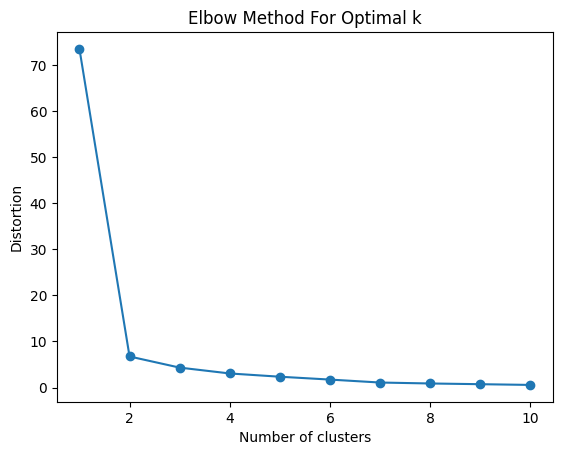

In [99]:
d = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_result)
    d.append(km.inertia_)

# Plot the elbow
plt.plot(range(1, 11), d, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We will use 2, the elbow point, as the optimal number of clusters.
##### 4. With $k = 2 $, perform Spectral Clustering.

Silhouette Score: 0.9113684891728968


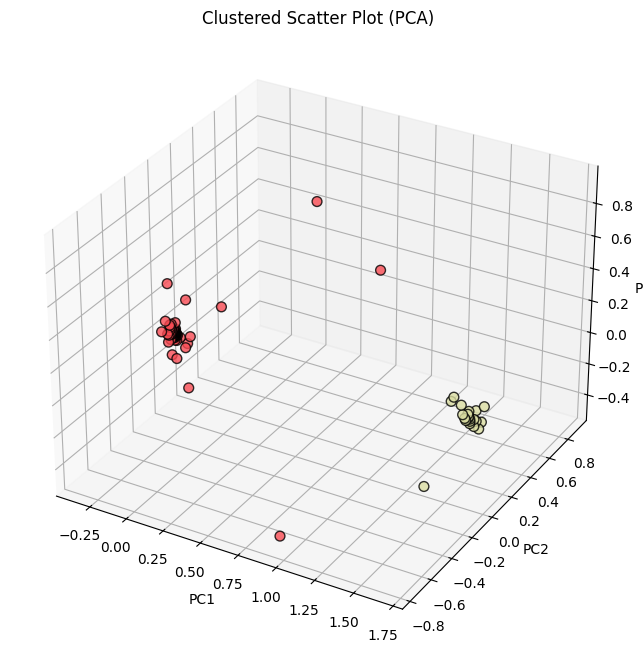

In [115]:
# Apply Spectral Clustering to PCA-transformed data
num_clusters = 2
cluster_labels_pca = SpectralClustering(n_clusters=num_clusters).fit_predict(pca_result)

# Compute Silhouette Score for Spectral Clustering
silhouette_avg_pca = silhouette_score(pca_result, cluster_labels_pca)
print(f'Silhouette Score: {silhouette_avg_pca}')

# Map cluster labels to random colors
label_color_map_pca = {label: np.random.rand(3,) for label in range(num_clusters)}

# Assign colors based on cluster labels
colors_pca = [label_color_map_pca[label] for label in cluster_labels_pca]

# Plot clustered scatter plot in 3D for PCA
fig_pca = plt.figure(figsize=(10, 8))
ax_pca = fig_pca.add_subplot(111, projection='3d')
ax_pca.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=colors_pca, marker='o', edgecolors='k', s=50, alpha=0.8)

ax_pca.set_title('Clustered Scatter Plot (PCA)')
ax_pca.set_xlabel('PC1')
ax_pca.set_ylabel('PC2')
ax_pca.set_zlabel('PC3')

plt.show()

### III. Conclusions

#### First Method
The provided eigenvalues and eigenvectors represent the spectral decomposition of the Laplacian matrix derived from the dataset. They provide valuable insights into the connectivity, structure, and potential clusters within the graph. 

A zero eigenvalue suggests that the graph is not fully connected, while the repeated eigenvalue of 1 implies the existence of clusters in the graph. Eigenvalues between 0 and 1 indicate weak connectivity and low-degree nodes. 

The eigenvector corresponding to the eigenvalue 1, also known as the Fiedler vector, is used for spectral clustering to partition the graph. The Fiedler vector provides information about the structure of the graph and can help identify nodes belonging to different clusters. Complex eigenvectors indicate oscillatory patterns or modes in the graph, associated with its connectivity and structure.

#### With sklearn
The spectral clustering graph based on the first three principal components (PCs) provides insights into the underlying structure of the data. It suggests that the data can be clustered into three distinct groups, which are well-separated. The first cluster (PC1) is the largest and most tightly bound, while the second cluster (PC2) is smaller and less tightly bound than the first cluster. The third cluster (PC3) is the smallest and most loosely bound cluster. The first principal component (PC1) captures the most variance in the data and is the most important dimension for distinguishing between the clusters. The second and third principal components (PC2 and PC3) contain less information but still contribute to the cluster separation. The spread of points within each cluster suggests that the clusters differ in their density, with the first cluster being particularly dense.

---
## Eigenvector Centrality -  Assignment 1

Given the following graph below, find it eigenvector centrality:

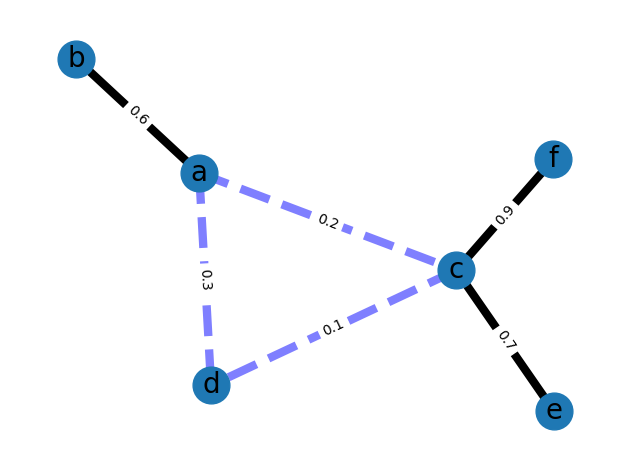

In [116]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

### Solution

In [117]:
# Calculate the eigenvector centrality for each node
eigen_central = nx.eigenvector_centrality(G)

# Display results
print("Graph G - Eigenvector Centralities:")
for node, cent in eigen_central.items():
    print(f"{node} = {cent:.5f}")

Graph G - Eigenvector Centralities:
a = 0.51807
b = 0.21182
c = 0.59868
d = 0.45660
e = 0.24478
f = 0.24478


---
## Assignment 2
Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

### Hypothesis
The hypothesis posits that individuals with high eigenvector centrality values in the "r/otomeisekai" subreddit will play a central role within the community, acting as influential connectors and significantly impacting the structure and interactions within the network. Eigenvector centrality considers both the quantity and quality of connections, meaning that individuals connected to many other influential members will have higher eigenvector centrality values. The individuals with many connections, especially to other influential members, have the potential to influence information flow, discussions, and overall community dynamics. It is predicted that individuals with high eigenvector centrality will be highly active and engaged in the community, have a significant impact on the flow of information and discussions within the subreddit, and be well-connected to other influential members, forming a core group that shapes the overall direction of the community.
### Social Network Analysis

Subreddit: r/ otomeisekai

Graph Information:
- Number of nodes = 87
- Number of edges = 100
- Average degree = 2.2988505747126435

Top 20 Nodes (Redditors) with Eigenvector Centrality:
1. Go_To_Bed97 = 0.1071
2. Papergirlpotter = 0.6875
3. minamikujou = 0.0999
4. mangagirl07 = 0.1387
5. WerePigCat = 0.1408
6. LazyKyd = 0.0979
7. Liolia = 0.1248
8. halokiller = 0.1048
9. PM-ME-QUEER-HISTORY = 0.1022
10. Ygritte_02 = 0.1144
11. white_gummy = 0.1020
12. Peytonhawk = 0.0979
13. MysticCherryBlossom = 0.1048
14. aoisyui = 0.1259
15. BenTulfo = 0.1048
16. 2d_simping101 = 0.0979
17. Isekai_Trash_uwu = 0.0979
18. NekoNoSekai = 0.0979
19. Ruruskadoo = 0.0979
20. NightHalocraft = 0.1047

Graph Visualization - Spring Layout:


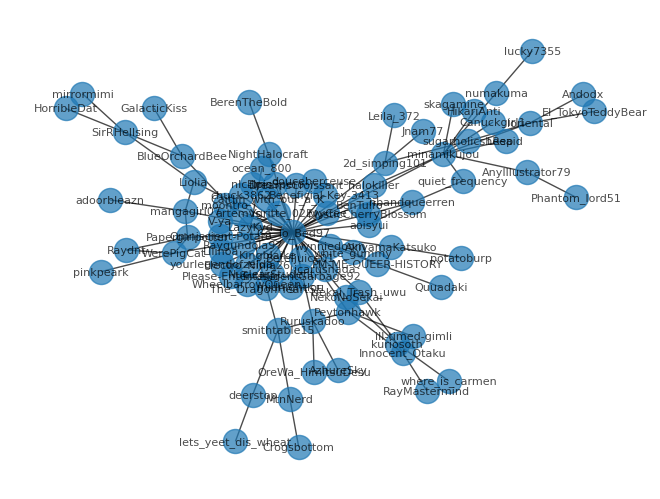

In [10]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit_api = praw.Reddit(
    client_id='b24kaEjK6RXmg8R9loisLQ',
    client_secret='TQ4j2QF02mLBNU91vda5g2P9_W-wQA',
    user_agent='eigencentral-indecisivepinkyoda',
)

def build_graph(post_id):
    sub = reddit_api.submission(id=post_id)
    graph = nx.Graph()

    for c in sub.comments.list():
        if not isinstance(c, praw.models.MoreComments) and c.author:
            parent_comment = c.parent()
            if not isinstance(parent_comment, praw.models.MoreComments) and parent_comment.author:
                graph.add_edge(c.author, parent_comment.author)

    return graph

def print_graph_info(graph):
    print("\nGraph Information:")
    print("- Number of nodes =", graph.number_of_nodes())
    print("- Number of edges =", graph.number_of_edges())
    print("- Average degree =", sum(dict(graph.degree()).values()) / graph.number_of_nodes())

def print_top_users(centralities, top_users):
    print("\nTop 20 Nodes (Redditors) with Eigenvector Centrality:")
    for i, (user, centrality) in enumerate(zip(top_users, centralities.values()), start=1):
        print(f"{i}. {str(user)} = {centrality:.4f}")

def visualize(graph):
    print("\nGraph Visualization - Spring Layout:")
    nx.draw(graph, nx.spring_layout(graph), with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

subreddit_name = "otomeisekai"
sub = reddit_api.subreddit(subreddit_name)
print("Subreddit: r/", sub.display_name)

top_post = sub.top(limit=1).__next__()
post_id = top_post.id

graph = build_graph(post_id)
print_graph_info(graph)

centralities = nx.eigenvector_centrality(graph)
top_users = sorted(centralities, key=centralities.get, reverse=True)[:20]
print_top_users(centralities, top_users)
visualize(graph)

### Conclusion
The spring layout graph of the "r/otomeisekai" subreddit social network shows that the community is densely connected, with a few central hubs that play a crucial role in connecting other influential members and shaping the interactions and structure of the subreddit. These central hubs have high eigenvector centrality values, indicating that they are connected to many other important members of the community. They are well-positioned to influence the flow of information and communication within the subreddit. The analysis supports the hypothesis that certain users exhibit higher eigenvector centrality values, indicative of their central role within the community.